# Test di Pearson - Dati orari

In [10]:
import os
import math
from pandas import *
import pandas as pd
from datetime import datetime
%matplotlib inline 
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm
from scipy.stats import genextreme,gumbel_r
from numpy import linspace
from pylab import plot,show,hist,figure,title
from my_functions import*
os.getcwd()

'C:\\Users\\Tom\\1A_Idrologia\\dati\\xz. Esercitazione1'

In [11]:
data=leggi_orarie('MORI_massimi di precipitazione.xls')
data

,1 ora,3 ore,6 ore,12 ore,24 ore
anno,,,,,
1919.0,NaN,NaN,NaN,NaN,NaN
1920.0,NaN,NaN,NaN,NaN,NaN
1921.0,NaN,NaN,NaN,NaN,NaN
1922.0,NaN,NaN,NaN,NaN,NaN
1923.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2006.0,29.2,29.6,43,56.4,62
2007.0,28.2,31.8,36.6,56,109.8
2008.0,NaN,NaN,NaN,NaN,NaN


In [12]:
ab_m=pd.read_pickle("ab_m")
ab_mq=pd.read_pickle("ab_mq")
ab_ml=pd.read_pickle("ab_ml")

In [13]:
a=[]
for h in data.columns:
    a=a+[[X2(data,ab_m,h,0.2),X2(data,ab_mq,h,0.2),X2(data,ab_ml,h,0.2)]]

pd.DataFrame(a,index=["            1 ora","            3 ore", "            6 ore","            12 ore","            24 ore"],columns=["M","MQ","ML"])

,M,MQ,ML
1 ora,1.555556,1.333333,2.888889
3 ore,5.111111,2.666667,5.333333
6 ore,1.333333,3.777778,1.333333
12 ore,6.888889,0.666667,4.222222
24 ore,2.666667,2.666667,2.666667


In [14]:
best=DataFrame([ab_mq["            1 ora"],
                ab_mq["            3 ore"],
                ab_m["            6 ore"],
                ab_mq["            12 ore"],ab_m["            24 ore"]]).T
                  
best

,1 ora,3 ore,6 ore,12 ore,24 ore
a,19.345627,29.008748,38.945067,49.890848,66.109911
b,5.101285,7.074121,9.238680,13.282743,15.744317


In [15]:
best.to_pickle("best_param")

In [16]:
def gumbel(x,abs_d,col):
    return np.exp(-np.exp(-(x-abs_d[col]["a"])/abs_d[col]["b"]))
t_rain=np.linspace(data.min()[0],data.max()[3],100)

In [17]:
gb=pd.DataFrame([gumbel(t_rain,best,"            1 ora"),
                 gumbel(t_rain,best,"            3 ore"),
                 gumbel(t_rain,best,"            6 ore"),
                 gumbel(t_rain,best,"            12 ore"),gumbel(t_rain,best,"            24 ore")]).T
gb.index=t_rain
gb.columns=["            1 ora","            3 ore","            6 ore","            12 ore","            24 ore"]
gb[-5:]

,1 ora,3 ore,6 ore,12 ore,24 ore
7.000000,0.000013,1.783727e-10,1.633380e-14,1.075072e-11,2.834959e-19
7.933333,0.000086,2.859533e-09,3.450324e-13,5.966319e-11,3.312049e-18
8.866667,0.000410,3.253300e-08,5.436711e-12,2.947632e-10,3.358930e-17
9.800000,0.001509,2.740467e-07,6.572765e-11,1.306666e-09,2.981233e-16
10.733333,0.004471,1.773905e-06,6.253915e-10,5.235702e-09,2.333539e-15
...,...,...,...,...,...
95.666667,1.000000,9.999191e-01,9.978465e-01,9.686378e-01,8.581270e-01
96.600000,1.000000,9.999291e-01,9.980532e-01,9.707344e-01,8.657175e-01
97.533333,1.000000,9.999379e-01,9.982401e-01,9.726929e-01,8.729325e-01
98.466667,1.000000,9.999456e-01,9.984091e-01,9.745220e-01,8.797873e-01


([<matplotlib.lines.Line2D at 0x18eb05169c8>],
 [<matplotlib.lines.Line2D at 0x18eb053b548>])

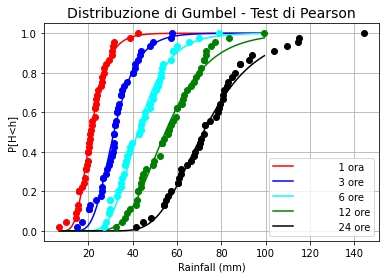

In [9]:
plot_pearson_orarie(data, gb)